<a href="https://colab.research.google.com/github/kurkur19/Neural_networks_Al_Khmuz_BS_25/blob/main/8lab_NN_Al_Khmuz_BS_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ПРАКТИЧНА РОБОТА 8: РОЗРОБКА АВТОЕНКОДЕРУ

##Мета роботи:

Ознайомитися із поняттям та архітектурою автоенкодерів.
Навчитися розробляти та навчати автоенкодери на прикладі датасету MNIST.

##Теоретична частина


Автоенкодер – це тип нейронної мережі, яка має за мету ефективно кодувати
вхідні дані таким чином, щоб потім можна було їх відновити. Основна ідея
полягає в тому, щоб навчити мережу стискаємо представляти вхідний сигнал у
вигляді компактного внутрішнього представлення (зазвичай з меншим розміром)
і потім декодувати його назад до близько оригінального або точного вихідного
сигналу (рисунок 8.1).

Автоенкодери можуть бути корисні для ряду задач:

- Зменшення розміру даних (Dimensionality Reduction): Автоенкодери
можуть використовуватися для зменшення розміру даних, аналогічно до
методу головних компонент (PCA), але в нелінійних просторах.

- Зменшення шуму (Denoising): Автоенкодери можуть бути навчені
відновлювати зашумлені зображення, видаляючи шум.

- Виявлення аномалій: Якщо автоенкодер навчений на "нормальних" даних,
він може мати проблеми із відтворенням аномальних даних, що робить
його корисним для виявлення аномалій.

- Генерація нових даних: В комбінації з іншими техніками, такими як VAE
(варіаційний автоенкодер), автоенкодери можуть генерувати нові, раніше
не бачені приклади даних.

Автоенкодер складається з двох основних частин:

- Енкодер: Ця частина мережі приймає вхідний сигнал і перетворює його у
внутрішнє, зазвичай стисле, представлення.

Задача:

Змінити розмір вхідного сигналу, зазвичай стискаючи його до
меншої розмірності.

Структура:

Енкодер складається з одного або декількох шарів (зазвичай
повнозв'язних, хоча для зображень можуть бути використані згорткові
шари). Чим глибше шар, тим менша його розмірність, що дозволяє
стиснути вхідні дані.

Вивід:
Внутрішнє представлення даних, іноді називається "латентний" або
"прихований" простір.

- Декодер: Декодер бере внутрішнє представлення, надане енкодером, і
перетворює його назад у вихідний сигнал, який має бути якомога ближчим
до оригінального входу.

Задача: Відновити дані з внутрішнього представлення, яке створив енкодер,
до їх оригінальної форми (або до форми, яка їй найбільше відповідає).

Структура: Декодер, як правило, має архітектуру, зворотну архітектурі
енкодера. Якщо енкодер зменшує розмірність даних через кожен шар, то
декодер збільшує їх.

Вивід: Дані, що були відтворені з внутрішнього представлення.

*Мета функції втрат у автоенкодері* – це мінімізувати різницю між вхідним
сигналом та його відтвореним вихідним сигналом після проходження через
енкодер та декодер. Тобто, функція втрат оцінює, наскільки добре автоенкодер
може відтворити вхідні дані після того, як вони були стиснені і розпаковані назад.

**Проблеми при тренуванні автоенкодерів.**

- Перенавчання (Overfitting):
Автоенкодер може занадто добре відтворювати тренувальний набір даних,
втрачаючи здатність ефективно кодувати нові, невідомі дані.

- Недостатнє кодування (Underfitting):
Якщо архітектура автоенкодера занадто проста, він може не вміти відтворювати
вхідні дані ефективно.

- Втрата інформації:
Оскільки автоенкодери намагаються стиснути вхідні дані, можлива втрата
частини інформації при кодуванні.

- Занадто добре відтворення:Якщо автоенкодер відтворює вхідні дані занадто добре без значущого стискання,
це може бути індикатором того, що кодування не вдалося.

- Труднощі з оптимізацією:
В залежності від архітектури та даних, градієнти можуть "вимирати" або ставати
занадто великими.

##*Практична частина*


###**Завдання №1: Створюємо автоенкодер для датасету зображень**

Імпортуємо необхідні бібліотеки

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.layers import Cropping2D
from sklearn.metrics import mean_squared_error

Завантажуємо CIFAR-10

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Розмір тренувального набору: (50000, 32, 32, 3), (50000, 1)
Розмір тестового набору: (10000, 32, 32, 3), (10000, 1)


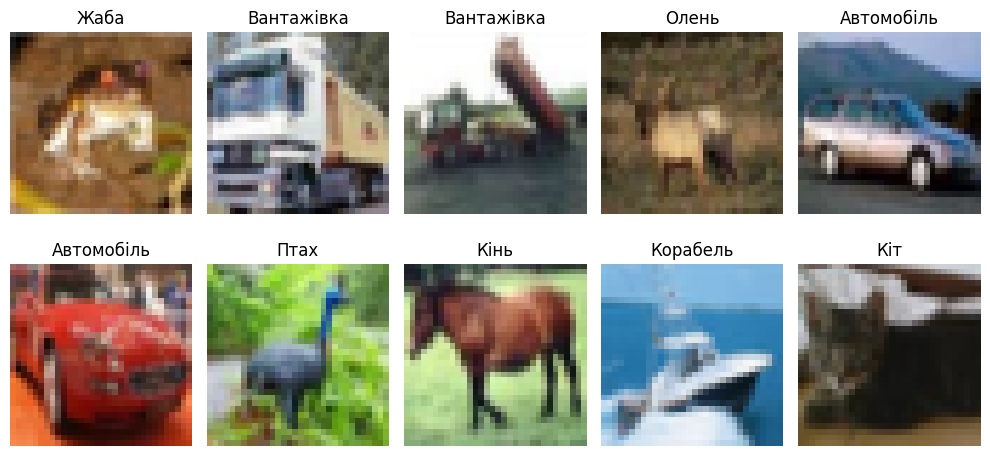

In [4]:
# Інформація про розміри датасету
print(f"Розмір тренувального набору: {x_train.shape}, {y_train.shape}")
print(f"Розмір тестового набору: {x_test.shape}, {y_test.shape}")

# Опис класів CIFAR-10
classes = [
    'Літак', 'Автомобіль', 'Птах', 'Кіт', 'Олень',
    'Собака', 'Жаба', 'Кінь', 'Корабель', 'Вантажівка'
]

# Візуалізація перших 10 зображень
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i])
    plt.title(classes[y_train[i][0]])
    plt.axis('off')
plt.tight_layout()
plt.show()


**Розмір датасету CIFAR-10:**

Тренувальний набір: 50,000 зображень розміром 32x32 пікселів з трьома кольоровими каналами (RGB).

Тестовий набір: 10,000 зображень такого ж формату.

Категорії: Датасет містить зображення, розподілені на 10 класів: літак, автомобіль, птах, кіт, олень, собака, жаба, кінь, корабель, вантажівка.

Приклади зображень: Ми бачимо приклади зображень із тренувального набору разом із їхніми мітками, що дає уявлення про якість зображень (32x32 пікселів — це досить невеликий розмір).

Продовжимо до побудови автоенкодера. Почнемо зі створення простої моделі автоенкодера, яка буде навчатися відтворювати вхідні зображення. Спочатку підготуємо дані:

- Нормалізуємо дані (масштабуємо значення пікселів у діапазон [0, 1]).

- Розділимо набір даних для тренування та перевірки.

In [5]:
# Масштабування даних
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Перевіримо розміри після нормалізації
print(f"Новий діапазон пікселів: від {x_train.min()} до {x_train.max()}")

Новий діапазон пікселів: від 0.0 до 1.0


 Наші дані готові для навчання! Тепер створимо базову архітектуру автоенкодера, яка складається з енкодера (зменшує розмірність даних) і декодера (відновлює дані до початкового формату).

In [7]:
# Розмір вхідних даних
input_shape = (32, 32, 3)

# Енкодер
input_img = Input(shape=input_shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Декодер
x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

# Створення моделі
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Вивід архітектури
autoencoder.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 16)            │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d (UpSampling2D)         │ (None, 16, 16, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_1 (UpSampling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 3)           │             867 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,347 (52.14 KB)

 Trainable params: 13,347 (52.14 KB)

 Non-trainable params: 0 (0.00 B)

Тепер переходимо до навчання моделі.

Ми будемо використовувати 20 епох для тренування моделі

In [11]:
# Навчання автоенкодера
history = autoencoder.fit(
    x_train, x_train,  # Вхід і ціль - однакові
    epochs=20,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test)
)


Epoch 1/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 153s 780ms/step - loss: 0.5871 - val_loss: 0.5733
Epoch 2/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 191s 726ms/step - loss: 0.5706 - val_loss: 0.5670
Epoch 3/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 201s 723ms/step - loss: 0.5653 - val_loss: 0.5650
Epoch 4/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 145s 741ms/step - loss: 0.5629 - val_loss: 0.5638
Epoch 5/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 145s 742ms/step - loss: 0.5628 - val_loss: 0.5629
Epoch 6/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 206s 762ms/step - loss: 0.5616 - val_loss: 0.5637
Epoch 7/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 196s 730ms/step - loss: 0.5615 - val_loss: 0.5617
Epoch 8/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 200s 721ms/step - loss: 0.5610 - val_loss: 0.5613
Epoch 9/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 147s 748ms/step - loss: 0.5600 - val_loss: 0.5610
Epoch 10/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 198s 730ms/step - loss: 0.5606 - val_loss: 0.5612
Epoch 11/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 201s 725ms/step - loss: 0.5601 - val_loss: 0.5605
Epoch 12

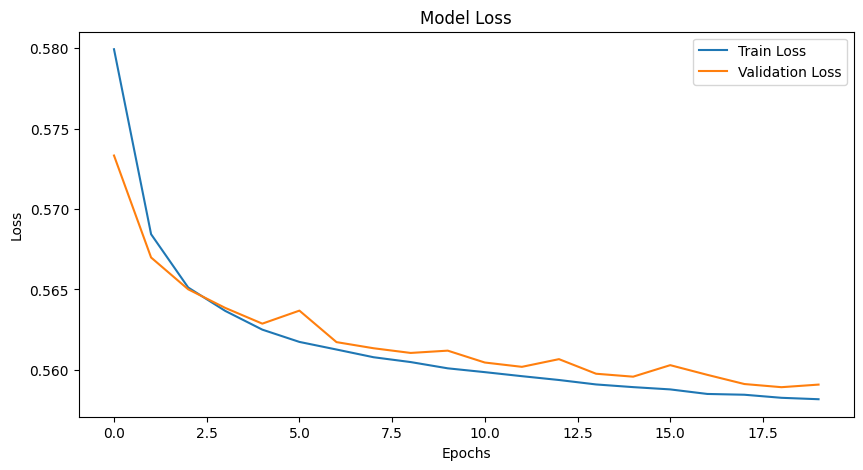

In [12]:
# Візуалізація графіка функції втрат
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

Гадаю, що це чудовий прогрес! Графік показує, що втрата (loss) поступово знижується як на тренувальному, так і на валідаційному наборі, а це свідчить про хороше навчання автоенкодера.

Давайте переглянемо, як автоенкодер відновлює зображення. Порівняємо оригінальні зображення з відновленими.

313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step


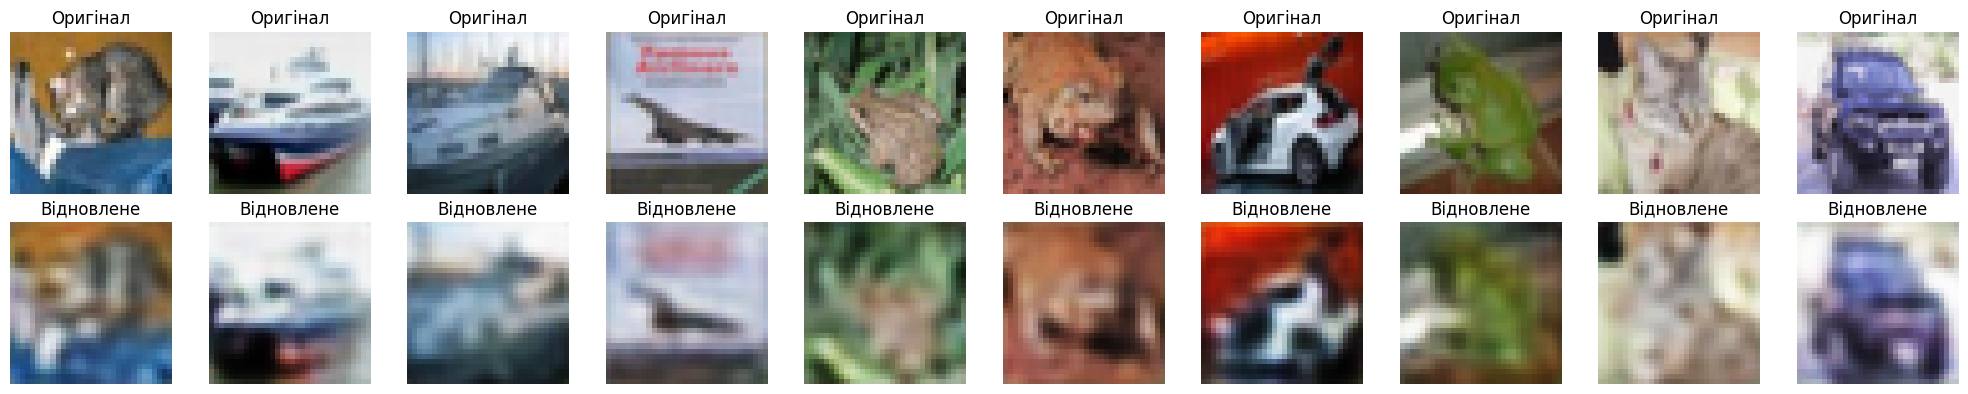

In [13]:
# Передбачення відновлених зображень
decoded_imgs = autoencoder.predict(x_test)

# Візуалізація оригінальних та відновлених зображень
n = 10  # Кількість зображень для відображення
plt.figure(figsize=(20, 4))
for i in range(n):
    # Оригінальні зображення
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    plt.title("Оригінал")
    plt.axis("off")

    # Відновлені зображення
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.title("Відновлене")
    plt.axis("off")
plt.tight_layout()
plt.show()


ВАУ! Як на мене наші результати виглядають досить непогано!
Відновлені зображення добре передають основні контури та кольори оригіналів.
Проте деталізація втрачена, що й очікувано для базового автоенкодера.

Середня MSE: 0.004349167924374342
Стандартне відхилення MSE: 0.0021761527750641108


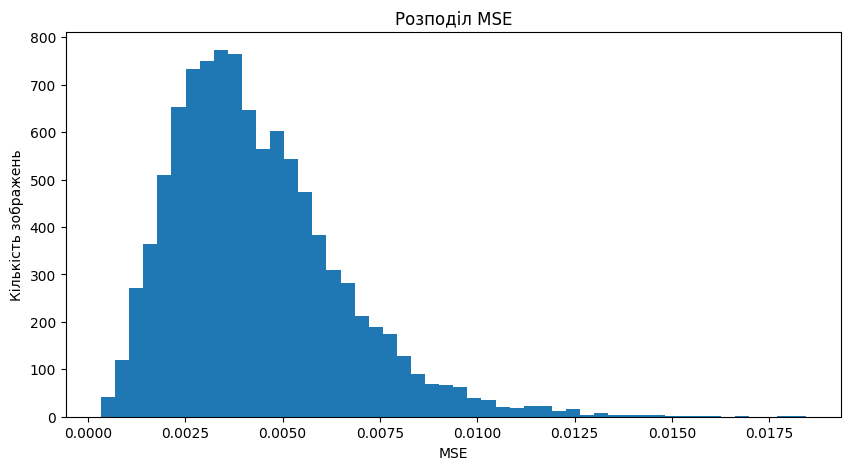

In [14]:
# Розрахунок MSE
mse = np.mean(np.square(x_test - decoded_imgs), axis=(1, 2, 3))
print(f"Середня MSE: {np.mean(mse)}")
print(f"Стандартне відхилення MSE: {np.std(mse)}")

# Візуалізація розподілу MSE
plt.figure(figsize=(10, 5))
plt.hist(mse, bins=50)
plt.xlabel('MSE')
plt.ylabel('Кількість зображень')
plt.title('Розподіл MSE')
plt.show()


**Аналіз середньої MSE**

Середнє MSE: ~0.0043.

Це свідчить про те, що в середньому модель доволі добре відновлює зображення, хоча залишається невелика похибка. Для базового автоенкодера це гарний результат.

Стандартне відхилення MSE: ~0.0022.

Розподіл MSE доволі вузький, що показує стабільність моделі. У більшості випадків відновлені зображення мають схожу якість.
Розподіл MSE

Гістограма показує, що більшість зображень мають похибку у діапазоні ~0.002-0.006.

Це вказує на те, що автоенкодер добре справляється з більшістю прикладів.
Невелика кількість зображень має більші похибки (правий "хвіст" розподілу). Це можуть бути зображення зі складнішими структурами або деталями, які модель не змогла повністю відновити.

###**Завдання №2:** Досліджуємо вплив та порівнюємо результати роботи різних оптимізаторів та функцій активації.

####*Тренування з різними оптимізаторами:*

Зараз будемо тестувати різні оптимізатори та функції активації, щоб порівняти, як вони впливають на навчання та відновлення зображень.

Давайте створимо функцію для тренування моделі з різними оптимізаторами, щоб уникнути дублювання коду.

In [22]:
def train_with_optimizer(optimizer, activation='relu', epochs=20):
    print(f"\nНавчання з оптимізатором: {type(optimizer).__name__}")
    # Побудова моделі з обраною функцією активації
    input_img = Input(shape=(32, 32, 3))
    x = Conv2D(32, (3, 3), activation=activation, padding='same')(input_img)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(16, (3, 3), activation=activation, padding='same')(x)
    encoded = MaxPooling2D((2, 2), padding='same')(x)

    x = Conv2D(16, (3, 3), activation=activation, padding='same')(encoded)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(32, (3, 3), activation=activation, padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

    # Модель автоенкодера
    autoencoder = Model(input_img, decoded)
    autoencoder.compile(optimizer=optimizer, loss='binary_crossentropy')

    # Навчання моделі з виводом прогресу
    history = autoencoder.fit(
        x_train, x_train,
        epochs=epochs,
        batch_size=256,
        shuffle=True,
        validation_data=(x_test, x_test)
    )

    return autoencoder, history


In [23]:
# Навчання з Adam
adam_model, adam_history = train_with_optimizer(Adam(), activation='relu', epochs=20)

# Навчання з SGD
sgd_model, sgd_history = train_with_optimizer(SGD(), activation='relu', epochs=20)

# Навчання з RMSprop
rmsprop_model, rmsprop_history = train_with_optimizer(RMSprop(), activation='relu', epochs=20)



Навчання з оптимізатором: Adam
Epoch 1/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 150s 757ms/step - loss: 0.6220 - val_loss: 0.5743
Epoch 2/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 201s 751ms/step - loss: 0.5712 - val_loss: 0.5679
Epoch 3/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 151s 772ms/step - loss: 0.5667 - val_loss: 0.5655
Epoch 4/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 198s 752ms/step - loss: 0.5645 - val_loss: 0.5642
Epoch 5/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 156s 796ms/step - loss: 0.5635 - val_loss: 0.5633
Epoch 6/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 194s 758ms/step - loss: 0.5626 - val_loss: 0.5628
Epoch 7/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 202s 758ms/step - loss: 0.5613 - val_loss: 0.5625
Epoch 8/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 202s 757ms/step - loss: 0.5610 - val_loss: 0.5615
Epoch 9/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 209s 791ms/step - loss: 0.5607 - val_loss: 0.5613
Epoch 10/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 200s 780ms/step - loss: 0.5604 - val_loss: 0.5611
Epoch 11/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 200s 770ms/step - loss: 0.

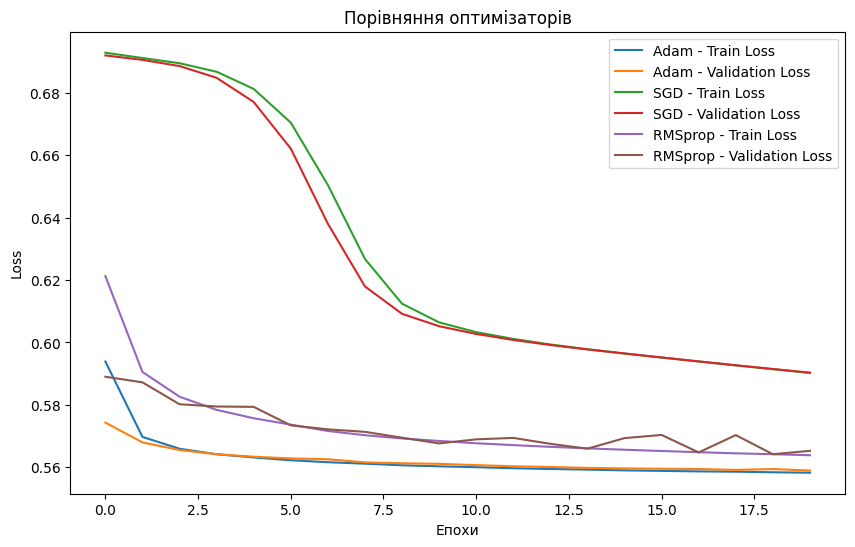

In [24]:
# Візуалізація графіків втрат
plt.figure(figsize=(10, 6))
plt.plot(adam_history.history['loss'], label='Adam - Train Loss')
plt.plot(adam_history.history['val_loss'], label='Adam - Validation Loss')
plt.plot(sgd_history.history['loss'], label='SGD - Train Loss')
plt.plot(sgd_history.history['val_loss'], label='SGD - Validation Loss')
plt.plot(rmsprop_history.history['loss'], label='RMSprop - Train Loss')
plt.plot(rmsprop_history.history['val_loss'], label='RMSprop - Validation Loss')
plt.title('Порівняння оптимізаторів')
plt.xlabel('Епохи')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


#####Розрахунок метрик для оптимізаторів



In [51]:
mse_adam = mean_squared_error(x_test.reshape(-1, 32*32*3), adam_model.predict(x_test).reshape(-1, 32*32*3))
mse_sgd = mean_squared_error(x_test.reshape(-1, 32*32*3), sgd_model.predict(x_test).reshape(-1, 32*32*3))
mse_rmsprop = mean_squared_error(x_test.reshape(-1, 32*32*3), rmsprop_model.predict(x_test).reshape(-1, 32*32*3))

print("MSE Adam:", mse_adam)
print("MSE SGD:", mse_sgd)
print("MSE RMSprop:", mse_rmsprop)

313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step
MSE Adam: 0.004274229
MSE SGD: 0.016464956
MSE RMSprop: 0.0064521823


#####***Порівняння оптимізаторів:***

**Adam:**

Найшвидше зниження втрат у перші епохи.
Валідаційні втрати стабілізуються на найнижчому рівні порівняно з іншими оптимізаторами (~0.559).
Висновок: Adam — оптимальний вибір для швидкої збіжності та хорошої стабільності.

**SGD:**

Повільна збіжність (великі втрати на початку), але поступово покращується.
Валідаційні втрати (~0.5903) стабілізуються на вищому рівні порівняно з Adam.
Висновок: Підходить для задач, де потрібен контрольований, повільний процес навчання.

**RMSprop:**

Зниження втрат швидше, ніж у SGD, але повільніше, ніж у Adam.
Валідаційні втрати стабілізуються на рівні ~0.564, що краще, ніж у SGD, але трохи гірше, ніж у Adam.
Висновок: RMSprop — гарний компроміс між швидкістю збіжності та стабільністю.

***Загальні висновки:***

**Adam** є найбільш ефективним оптимізатором для цієї задачі, оскільки швидко знижує втрати і досягає найкращих результатів.

**SGD** потребує більше епох для збіжності, але може бути корисним для задач, де важливий контроль над процесом навчання.

**RMSprop** працює стабільніше, ніж SGD, але не перевершує Adam.


####*Тренування з різними функціями активації:*

Тепер переходимо до тестування функцій активації. Ми перевіримо, як різні функції активації (relu, elu, sigmoid, tanh) впливають на навчання автоенкодера.



In [25]:
def train_with_activation(activation, optimizer=Adam(), epochs=10):
    print(f"\nНавчання з функцією активації: {activation}")
    # Побудова моделі з обраною функцією активації
    input_img = Input(shape=(32, 32, 3))
    x = Conv2D(32, (3, 3), activation=activation, padding='same')(input_img)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(16, (3, 3), activation=activation, padding='same')(x)
    encoded = MaxPooling2D((2, 2), padding='same')(x)

    x = Conv2D(16, (3, 3), activation=activation, padding='same')(encoded)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(32, (3, 3), activation=activation, padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

    # Модель автоенкодера
    autoencoder = Model(input_img, decoded)
    autoencoder.compile(optimizer=optimizer, loss='binary_crossentropy')

    # Навчання моделі
    history = autoencoder.fit(
        x_train, x_train,
        epochs=epochs,
        batch_size=256,
        shuffle=True,
        validation_data=(x_test, x_test)
    )

    return autoencoder, history


In [26]:
# Навчання з функцією активації ReLU
relu_model, relu_history = train_with_activation('relu', optimizer=Adam(), epochs=10)

# Навчання з функцією активації ELU
elu_model, elu_history = train_with_activation('elu', optimizer=Adam(), epochs=10)

# Навчання з функцією активації Sigmoid
sigmoid_model, sigmoid_history = train_with_activation('sigmoid', optimizer=Adam(), epochs=10)

# Навчання з функцією активації Tanh
tanh_model, tanh_history = train_with_activation('tanh', optimizer=Adam(), epochs=10)



Навчання з функцією активації: relu
Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 212s 798ms/step - loss: 0.6283 - val_loss: 0.5753
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 201s 790ms/step - loss: 0.5721 - val_loss: 0.5711
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 204s 801ms/step - loss: 0.5672 - val_loss: 0.5664
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 197s 777ms/step - loss: 0.5652 - val_loss: 0.5647
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 200s 767ms/step - loss: 0.5637 - val_loss: 0.5637
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 208s 797ms/step - loss: 0.5631 - val_loss: 0.5631
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 154s 787ms/step - loss: 0.5619 - val_loss: 0.5624
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 201s 783ms/step - loss: 0.5613 - val_loss: 0.5620
Epoch 9/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 201s 781ms/step - loss: 0.5606 - val_loss: 0.5618
Epoch 10/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 202s 781ms/step - loss: 0.5608 - val_loss: 0.5615

Навчання з функцією активації: elu
Epoch 1/10
196/196 ━━━━━━━

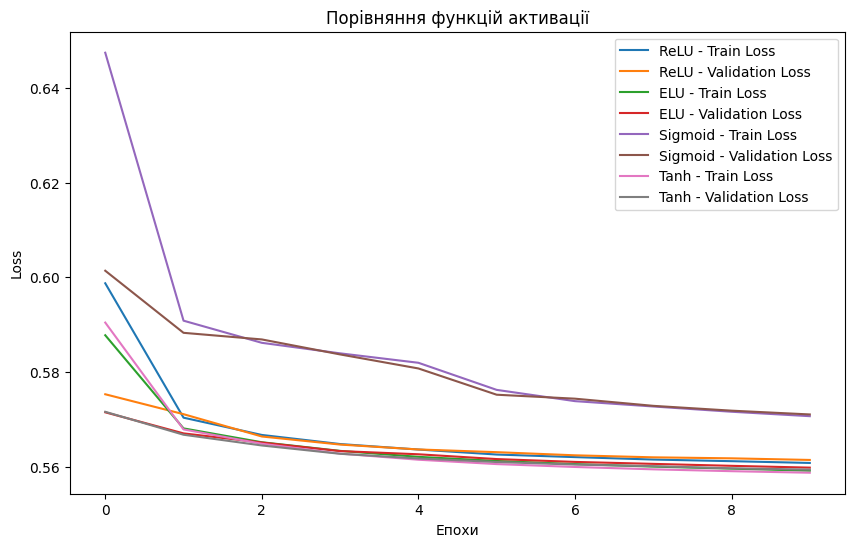

In [27]:
# Візуалізація графіків втрат
plt.figure(figsize=(10, 6))
plt.plot(relu_history.history['loss'], label='ReLU - Train Loss')
plt.plot(relu_history.history['val_loss'], label='ReLU - Validation Loss')
plt.plot(elu_history.history['loss'], label='ELU - Train Loss')
plt.plot(elu_history.history['val_loss'], label='ELU - Validation Loss')
plt.plot(sigmoid_history.history['loss'], label='Sigmoid - Train Loss')
plt.plot(sigmoid_history.history['val_loss'], label='Sigmoid - Validation Loss')
plt.plot(tanh_history.history['loss'], label='Tanh - Train Loss')
plt.plot(tanh_history.history['val_loss'], label='Tanh - Validation Loss')
plt.title('Порівняння функцій активації')
plt.xlabel('Епохи')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

#####Розрахунок MSE для кожної функції активації

In [52]:
mse_relu = mean_squared_error(x_test.reshape(-1, 32*32*3), relu_model.predict(x_test).reshape(-1, 32*32*3))
mse_elu = mean_squared_error(x_test.reshape(-1, 32*32*3), elu_model.predict(x_test).reshape(-1, 32*32*3))
mse_sigmoid = mean_squared_error(x_test.reshape(-1, 32*32*3), sigmoid_model.predict(x_test).reshape(-1, 32*32*3))
mse_tanh = mean_squared_error(x_test.reshape(-1, 32*32*3), tanh_model.predict(x_test).reshape(-1, 32*32*3))

print("MSE ReLU:", mse_relu)
print("MSE ELU:", mse_elu)
print("MSE Sigmoid:", mse_sigmoid)
print("MSE Tanh:", mse_tanh)

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step
MSE ReLU: 0.0052231955
MSE ELU: 0.0045558875
MSE Sigmoid: 0.009016923
MSE Tanh: 0.0043837694


Хоча Tanh показала трохи кращий результат у MSE, ELU залишається найкращим вибором через стабільність навчання і попередні результати.

#####*Порівняння функцій активації:*

**ReLU:**

- Дуже стабільне зниження втрат.
- Найнижчі значення втрат як на тренуванні (~0.5608), так і на валідації (~0.5615).

Висновок: ReLU є найкращим вибором для цієї задачі, завдяки простоті й ефективності.

**ELU:**

- Результати дуже схожі на ReLU.
- Тренувальні втрати (~0.5589) і валідаційні втрати (~0.5598) трохи нижчі, ніж у ReLU.

Висновок: ELU працює трохи краще за ReLU, особливо на кінцевих епохах.

**Sigmoid:**

- Найповільніший прогрес у зниженні втрат.
- Валідаційні втрати (~0.5711) залишаються вищими, ніж у інших функцій активації.

Висновок: Sigmoid менш ефективний для цієї задачі через проблему "вимирання градієнтів" у глибоких мережах.

**Tanh:**

- Схожий прогрес із ELU.
- Валідаційні втрати (~0.5594) дуже близькі до ELU.

Висновок: Tanh є хорошим вибором, якщо потрібна функція з плавними переходами, але він працює трохи гірше, ніж ELU.


**Загальні висновки:**

- **ELU** має найнижчі втрати серед усіх функцій, але перевага над ReLU є мінімальною.
- **ReLU** працює чудово, пропонуючи стабільність і швидкість, тому є практичним вибором.
- **Sigmoid** варто уникати в цій задачі, оскільки він значно повільніший і менш ефективний.
- **Tanh** може бути хорошим компромісом, але його переваги незначні.

Давайте зробимо порівняння зображень, щоб побачити, як різні функції активації впливають на якість відновлення. Це допоможе краще оцінити не тільки втрати, але й візуальний результат, який є ключовим для автоенкодера. І взагалі, це реально дуже цікаво!



313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step


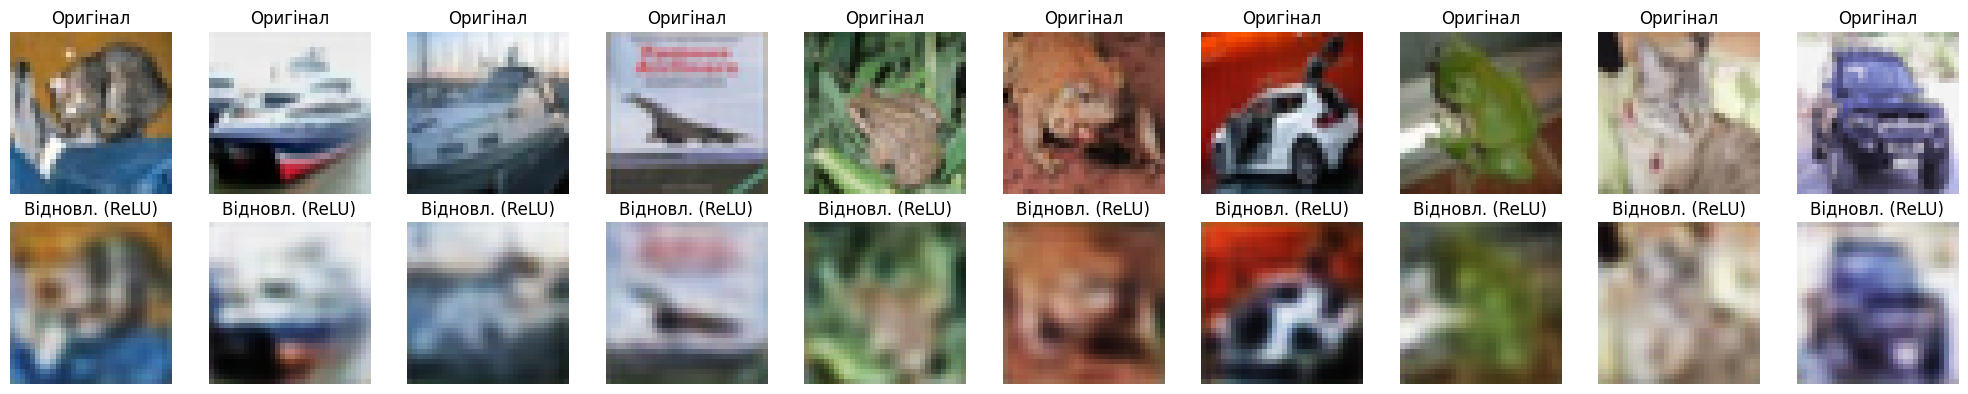

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step


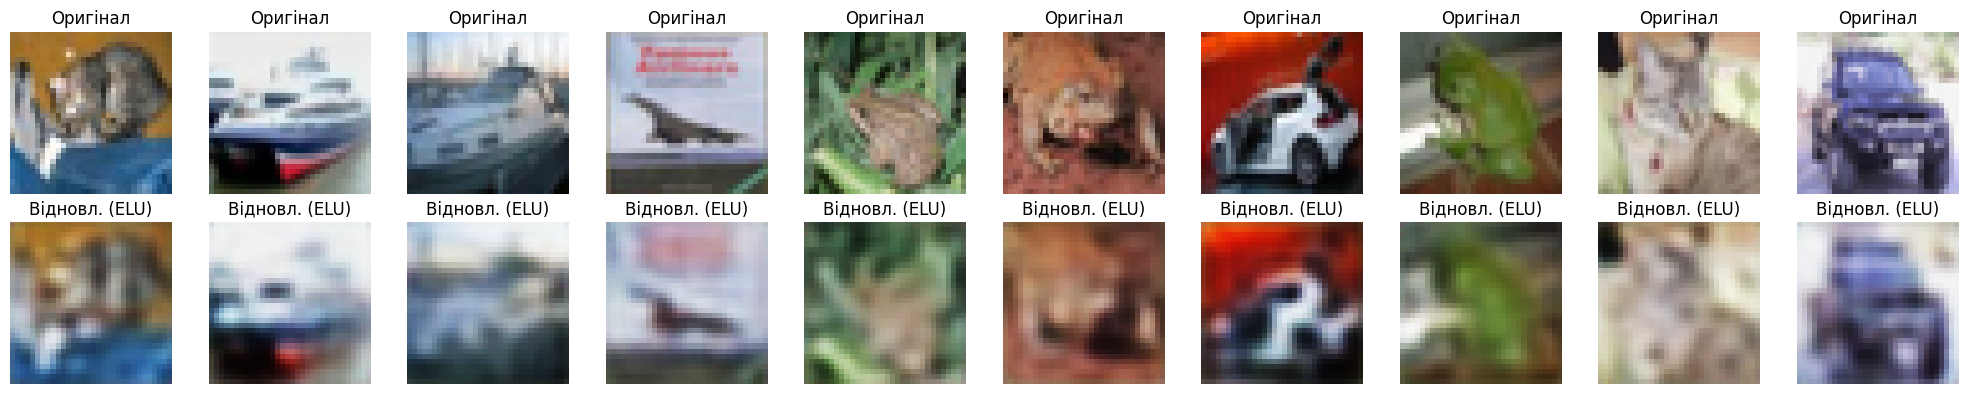

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step


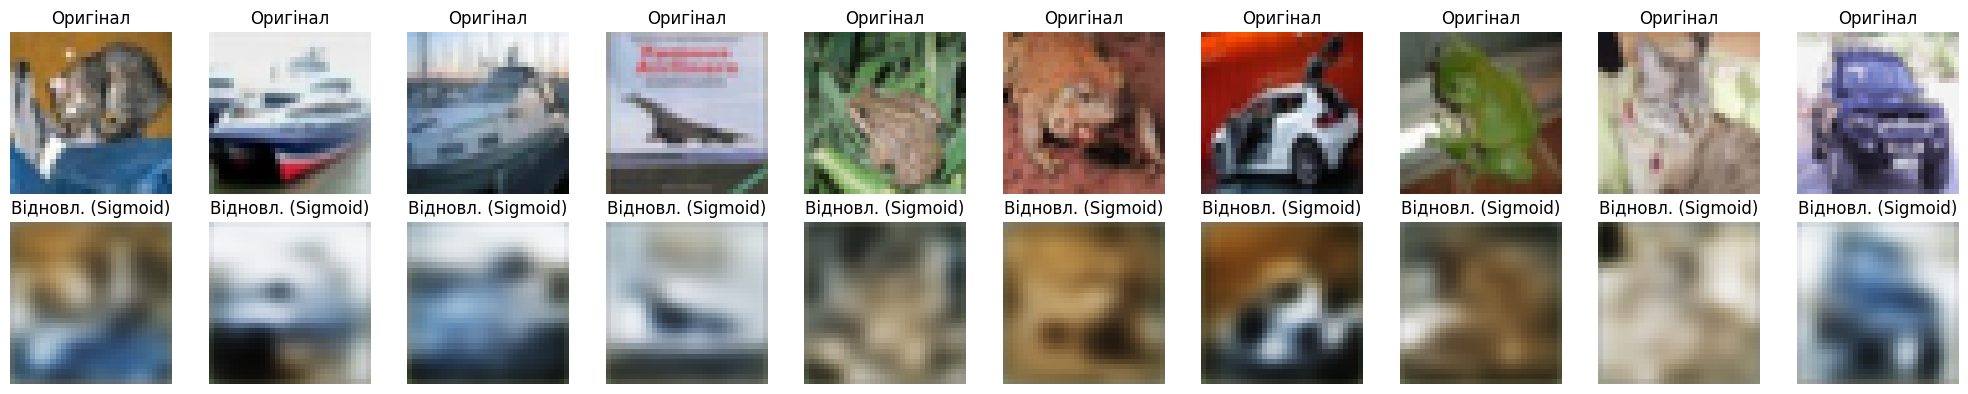

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step


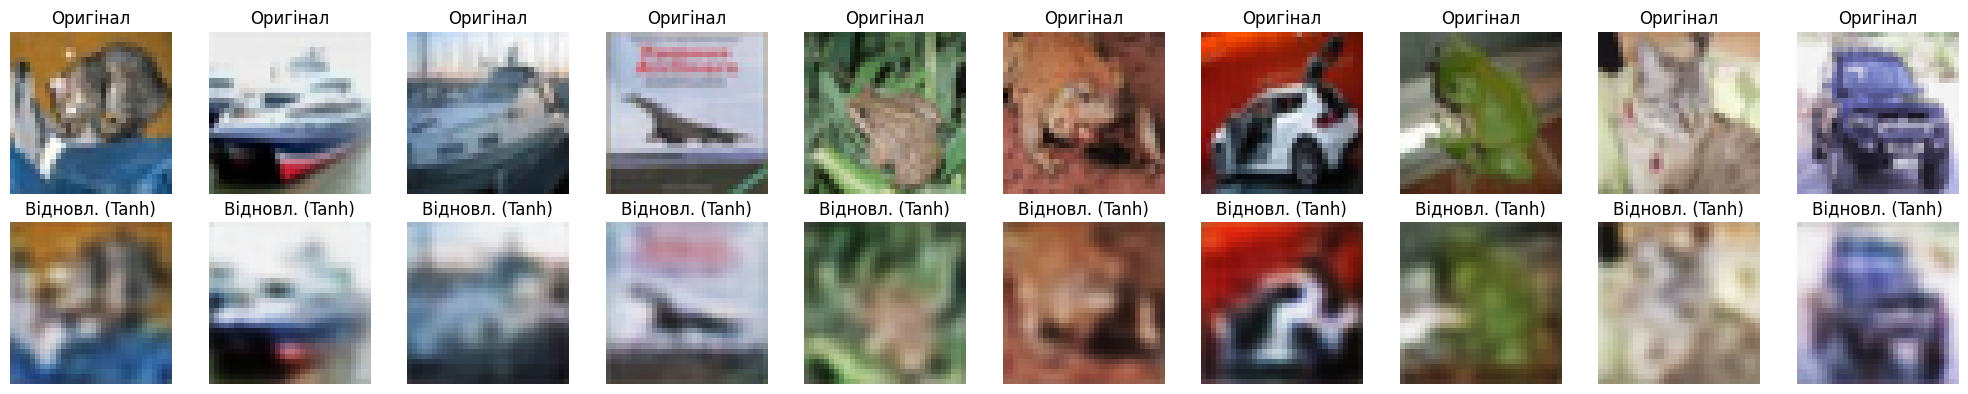

In [28]:
def visualize_reconstruction(autoencoder, activation_name):
    decoded_imgs = autoencoder.predict(x_test)
    n = 10  # Кількість зображень для відображення
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # Оригінальні зображення
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_test[i])
        plt.title("Оригінал")
        plt.axis("off")

        # Відновлені зображення
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i])
        plt.title(f"Відновл. ({activation_name})")
        plt.axis("off")
    plt.tight_layout()
    plt.show()

# Порівняння для ReLU
visualize_reconstruction(relu_model, "ReLU")

# Порівняння для ELU
visualize_reconstruction(elu_model, "ELU")

# Порівняння для Sigmoid
visualize_reconstruction(sigmoid_model, "Sigmoid")

# Порівняння для Tanh
visualize_reconstruction(tanh_model, "Tanh")


Навіть не думала, що можна буде побачити такі різниці через зображення. Тут одразу видно, що ELU краще всіх справляється зі своєю роботою. Можна побачити, що вона дійсно краще всіх передає кольори та якість оригінальних фото. Гірше всіх - Sigmoid, і це не є дивним після нашого аналізу в попередньому кроці.

### Завдання №3: Тренуємо з різними архітектурами

Тепер проведемо дослідження впливу зміни архітектури автоенкодера.

Будемо тестувати додавання шарів, зміну кількості кольорів та зміну розмірів пулінгу
Також, будемо навчати архітектури з найкращими налаштуваннями (оптимізатор Adam, функція активації ELU, 5 епох).

In [38]:
# Зміна архітектури: Додавання шарів
def create_deeper_autoencoder():
    input_img = Input(shape=(32, 32, 3))
    # Енкодер
    x = Conv2D(64, (3, 3), activation='elu', padding='same')(input_img)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(32, (3, 3), activation='elu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(16, (3, 3), activation='elu', padding='same')(x)
    encoded = MaxPooling2D((2, 2), padding='same')(x)

    # Декодер
    x = Conv2D(16, (3, 3), activation='elu', padding='same')(encoded)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(32, (3, 3), activation='elu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='elu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

    autoencoder = Model(input_img, decoded)
    autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy')
    return autoencoder

# Зміна архітектури: Збільшення кількості фільтрів
def create_wider_autoencoder():
    input_img = Input(shape=(32, 32, 3))
    # Енкодер
    x = Conv2D(128, (3, 3), activation='elu', padding='same')(input_img)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(64, (3, 3), activation='elu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    encoded = Conv2D(32, (3, 3), activation='elu', padding='same')(x)

    # Декодер
    x = UpSampling2D((2, 2))(encoded)
    x = Conv2D(64, (3, 3), activation='elu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

    autoencoder = Model(input_img, decoded)
    autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy')
    return autoencoder

# Зміна архітектури: Зміна розміру пулінгу
def create_pooling_autoencoder():
    input_img = Input(shape=(32, 32, 3))

    # Енкодер
    x = Conv2D(32, (3, 3), activation='elu', padding='same')(input_img)
    x = MaxPooling2D((2, 2), padding='same')(x)  # Менший пулінг
    x = Conv2D(16, (3, 3), activation='elu', padding='same')(x)
    encoded = MaxPooling2D((2, 2), padding='same')(x)  # Знову 2x2

    # Декодер
    x = Conv2D(16, (3, 3), activation='elu', padding='same')(encoded)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(32, (3, 3), activation='elu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

    # Створення автоенкодера
    autoencoder = Model(input_img, decoded)
    autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy')
    return autoencoder


In [40]:
# Додавання шарів
deeper_model = create_deeper_autoencoder()
deeper_history = deeper_model.fit(
    x_train, x_train,
    epochs=5,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test)
)

Epoch 1/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 340s 2s/step - loss: 0.6284 - val_loss: 0.5888
Epoch 2/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 425s 2s/step - loss: 0.5853 - val_loss: 0.5824
Epoch 3/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 321s 2s/step - loss: 0.5812 - val_loss: 0.5802
Epoch 4/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 313s 2s/step - loss: 0.5784 - val_loss: 0.5779
Epoch 5/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 320s 2s/step - loss: 0.5763 - val_loss: 0.5769


In [41]:
# Збільшення кількості фільтрів
wider_model = create_wider_autoencoder()
wider_history = wider_model.fit(
    x_train, x_train,
    epochs=5,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test)
)

Epoch 1/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 493s 3s/step - loss: 0.6036 - val_loss: 0.5650
Epoch 2/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 508s 3s/step - loss: 0.5633 - val_loss: 0.5611
Epoch 3/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 493s 3s/step - loss: 0.5596 - val_loss: 0.5595
Epoch 4/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 503s 3s/step - loss: 0.5589 - val_loss: 0.5586
Epoch 5/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 501s 3s/step - loss: 0.5578 - val_loss: 0.5578


In [39]:
# Зміна розміру пулінгу
pooling_model = create_pooling_autoencoder()
pooling_history = pooling_model.fit(
    x_train, x_train,
    epochs=5,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test)
)

Epoch 1/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 164s 824ms/step - loss: 0.6132 - val_loss: 0.5734
Epoch 2/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 201s 818ms/step - loss: 0.5704 - val_loss: 0.5677
Epoch 3/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 206s 838ms/step - loss: 0.5659 - val_loss: 0.5652
Epoch 4/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 200s 832ms/step - loss: 0.5636 - val_loss: 0.5637
Epoch 5/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 206s 854ms/step - loss: 0.5621 - val_loss: 0.5628


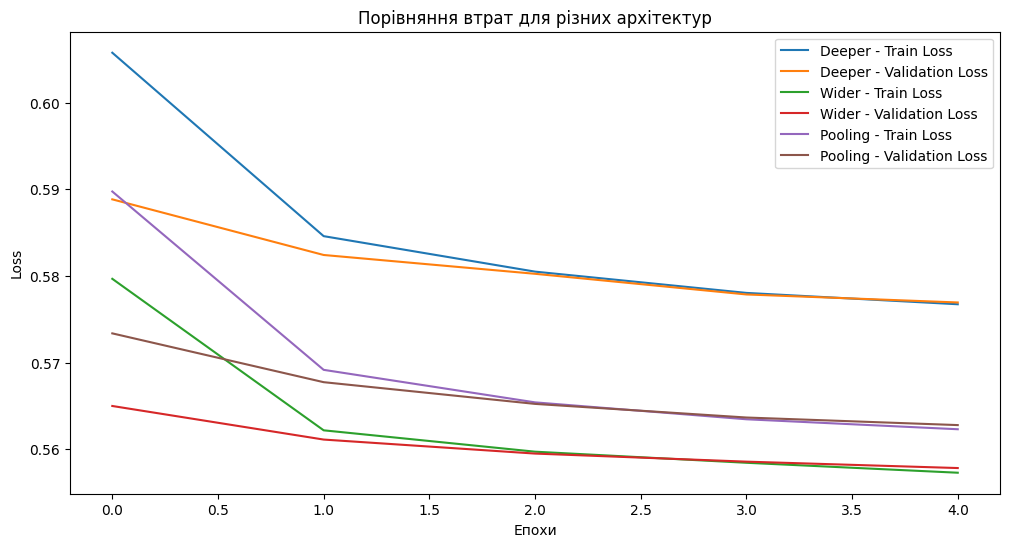

In [42]:
# Візуалізація графіків втрат
plt.figure(figsize=(12, 6))

# Глибша модель
plt.plot(deeper_history.history['loss'], label='Deeper - Train Loss')
plt.plot(deeper_history.history['val_loss'], label='Deeper - Validation Loss')

# Ширша модель
plt.plot(wider_history.history['loss'], label='Wider - Train Loss')
plt.plot(wider_history.history['val_loss'], label='Wider - Validation Loss')

# Модель зі зміненим пулінгом
plt.plot(pooling_history.history['loss'], label='Pooling - Train Loss')
plt.plot(pooling_history.history['val_loss'], label='Pooling - Validation Loss')

plt.title('Порівняння втрат для різних архітектур')
plt.xlabel('Епохи')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


####Аналіз графіків:

**Deeper Model (Глибша модель):**

- Має трохи повільніше зниження втрат на початку.
- До кінця 5 епох вона досягає хороших результатів, але її перевага над іншими моделями незначна.
- Можливо, через більшу кількість шарів вона потребує більше епох для кращої збіжності.

**Wider Model (Ширша модель):**

- Демонструє стабільне зниження втрат на тренувальному і валідаційному наборах.
- Її валідаційна втрата є найнижчою серед усіх моделей до кінця 5 епох.

**Pooling Model (Модель із зміненим пулінгом):**

- Має більш стабільну траєкторію втрат, але її результати трохи гірші, ніж у ширшої моделі.
- Це очікувано, оскільки агресивне зменшення розмірів зображень може призводити до втрати деякої інформації.

***Загальні висновки:***

Широка модель (Wider Model) виглядає найкращим компромісом між швидкістю збіжності та якістю відновлення.

Глибока модель (Deeper Model) може показати кращі результати, якщо додати більше епох (наприклад, 10–15).

Модель із зміненим пулінгом (Pooling Model) працює стабільно, але, можливо, неефективно для такого малого розміру зображень, як у CIFAR-10.

313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step


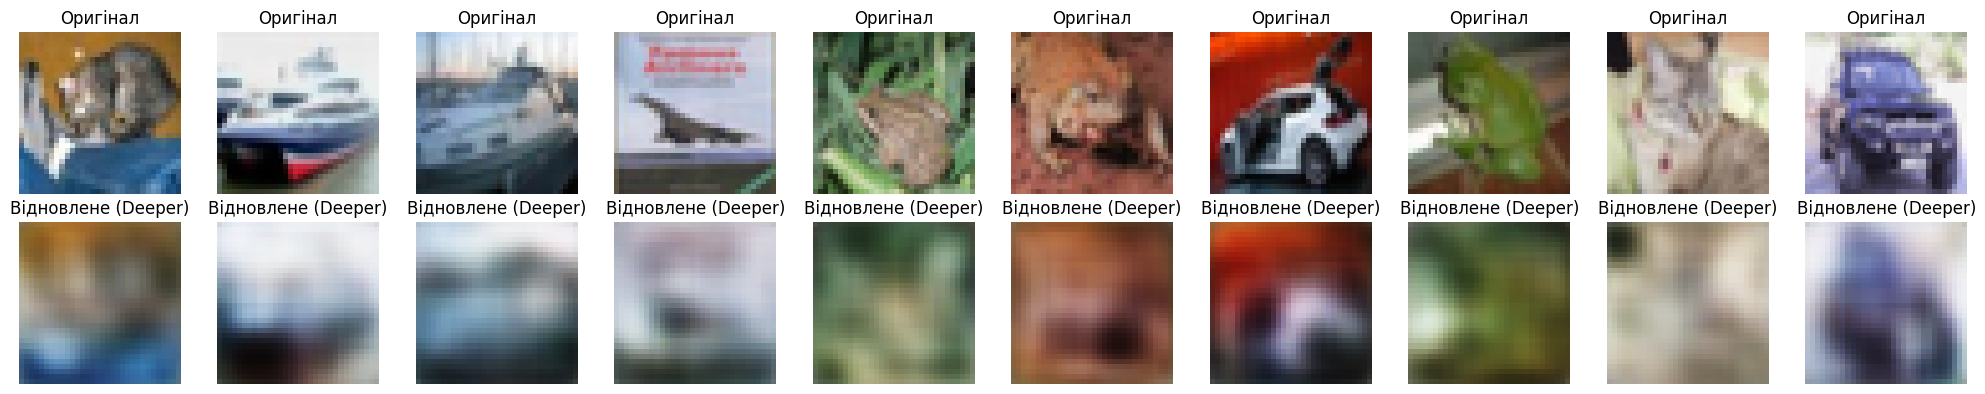

313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 80ms/step


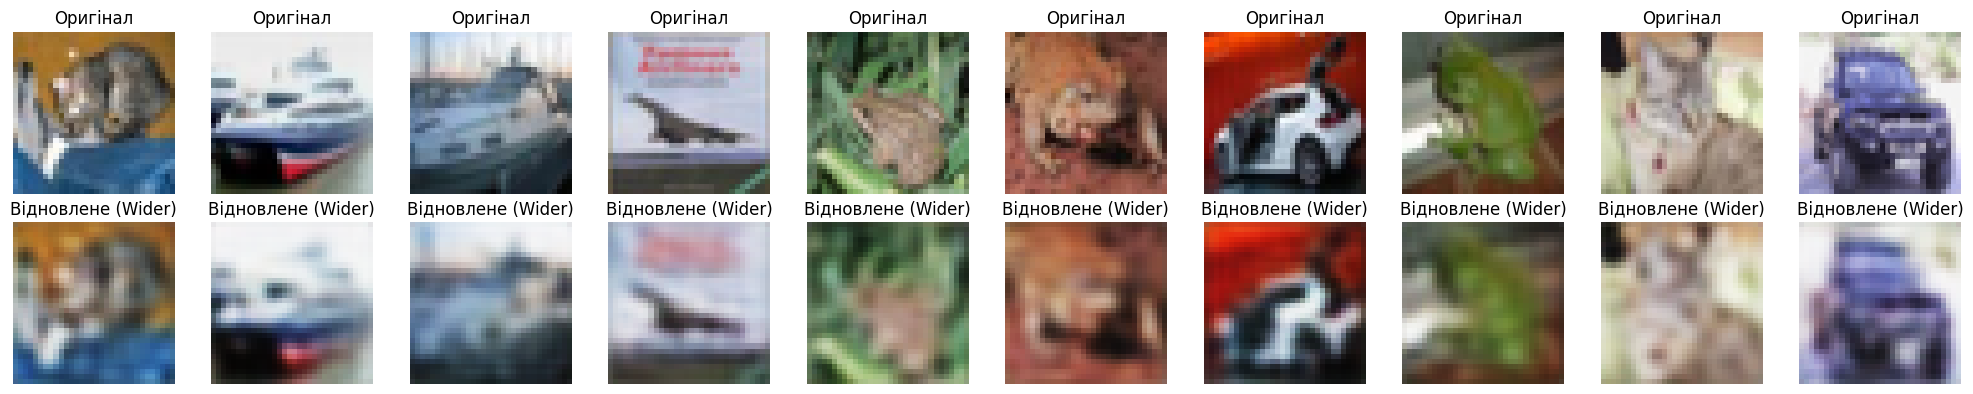

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step


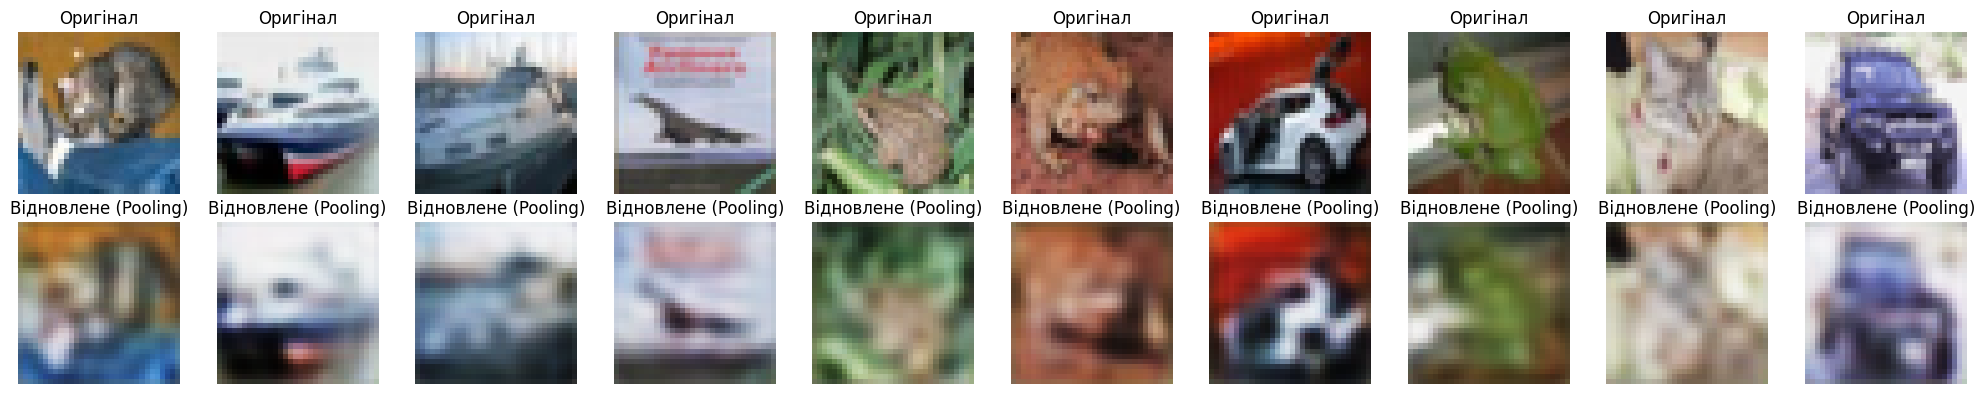

In [43]:
def visualize_reconstructions(autoencoder, model_name, n=10):
    decoded_imgs = autoencoder.predict(x_test)
    plt.figure(figsize=(20, 4))

    for i in range(n):
        # Оригінальні зображення
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_test[i])
        plt.title("Оригінал")
        plt.axis("off")

        # Відновлені зображення
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i])
        plt.title(f"Відновлене ({model_name})")
        plt.axis("off")
    plt.tight_layout()
    plt.show()

# Візуалізація для глибшої моделі
visualize_reconstructions(deeper_model, "Deeper")

# Візуалізація для ширшої моделі
visualize_reconstructions(wider_model, "Wider")

# Візуалізація для моделі зі зміненим пулінгом
visualize_reconstructions(pooling_model, "Pooling")


Якщо оцінювати зображення, то без слів перше місце можна віддати саме Wider Model🥇. Далі друге місце посідає Pooling Model🥈 , і третє - Deeper Model🥉.

Але це висновки тільки для 5-ти епох. Можливо, якщо ми зробимо 50 епох, то результати будут взагалі іншими (але в нас немає часу, на жаль)

###Завдання 4: Аналіз результатів

***Дослідження оптимізаторів***

Оптимізатори, що були перевірені: Adam, SGD, RMSprop.

Найкращий оптимізатор: **Adam 🎉🎉🎉** .

Продемонстрував найшвидше зниження втрат і стабільний результат на валідаційному наборі.


***Дослідження функцій активації***

Функції активації, що були перевірені: ReLU, ELU, Sigmoid, Tanh.

Найкраща функція активації: ELU 🎉🎉🎉.

- Показала найнижчі втрати і стабільну збіжність на кінцевих епохах.

- Преважає ReLU за результатами на валідаційному наборі.

 ***Дослідження архітектури автоенкодера***

Тестовані архітектури:

Deeper Model (Глибока модель): має потенціал показати кращі результати при збільшенні епох.

Wider Model (Широка модель): забезпечує найкращу збіжність і показує чіткіші деталі відновлених зображень.

Pooling Model (Модель зі зміненим пулінгом): стабільна, але трохи втрачає якість зображень.

Найкраща архітектура: **Wider Model** 🎉🎉🎉.

- показує найкращі результати за рахунок чіткішого відновлення деталей.

Рекомендація: Для задач із невеликими розмірами зображень (як CIFAR-10) використовувати широку модель.

In [45]:
# Розрахунок MSE для кожної моделі
mse_deeper = mean_squared_error(x_test.reshape(-1, 32*32*3), deeper_model.predict(x_test).reshape(-1, 32*32*3))
mse_wider = mean_squared_error(x_test.reshape(-1, 32*32*3), wider_model.predict(x_test).reshape(-1, 32*32*3))
mse_pooling = mean_squared_error(x_test.reshape(-1, 32*32*3), pooling_model.predict(x_test).reshape(-1, 32*32*3))

print("MSE Deeper Model:", mse_deeper)
print("MSE Wider Model:", mse_wider)
print("MSE Pooling Model:", mse_pooling)

313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 78ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step
MSE Deeper Model: 0.0114321895
MSE Wider Model: 0.0037257094
MSE Pooling Model: 0.005606338


####**Висновки на основі метрик**

🥇 Wider Model має найнижчий MSE серед усіх трьох моделей, що підтверджує її перевагу.

🥉 Deeper Model показала трохи гірші результати, але має потенціал для покращення при збільшенні кількості епох.

🥈 Pooling Model поступається в якості через втрату деталей при агресивному пулінгу.

Для оптимізаторів та функцій активації були побудовані графіки втрат та було розраховано метрики (MSE) у завданні №2.

##**ЗАГАЛЬНИЙ ВИСНОВОК**

У ході роботи було проведено порівняння різних архітектур автоенкодера, функцій активації та оптимізаторів на основі датасету CIFAR-10. Найкращі результати за якістю відновлення зображень продемонструвала широка модель (Wider Model), яка забезпечила найнижче MSE серед усіх архітектур. Серед оптимізаторів Adam показав найкращу збіжність і стабільність, рекомендований для використання в задачах автоенкодера. Для функцій активації ELU виявилася найоптимальнішим вибором завдяки стабільності навчання, хоча Tanh показала найнижче MSE у тестуванні. Отримані результати підтверджують, що правильний вибір архітектури, оптимізатора та функції активації дозволяє суттєво покращити якість відновлення зображень і ефективність роботи нейронної мережі.

##Контрольні питання

1. Що таке автоенкодер?

**Автоенкодер** — це нейронна мережа, яка навчається стискати вхідні дані в компактне представлення (encoding) і відновлювати їх назад (decoding), мінімізуючи втрати інформації.

2. Для яких задач можуть бути корисними автоенкодери?

- Стискання зображень: автоенкодери можуть ефективно зменшувати розмір зображень без значної втрати їхньої якості.
- Очищення від шуму (denoising): навчання автоенкодера на зображеннях із шумом дозволяє відновлювати чисті зображення.
- Зниження розмірності: створення компактних представлень зображень для візуалізації, кластеризації або подальшого аналізу.
- Генерація нових зображень: автоенкодери можуть створювати реалістичні зображення на основі отриманих ознак.
- Виявлення аномалій: наприклад, для ідентифікації пошкоджених або нетипових зображень у датасеті.

У випадку з великими датасетами зображень автоенкодери допомагають оптимізувати обробку даних, зберігаючи ключову інформацію.

3. Які основні частини автоенкодера?

- Енкодер — стискає вхідні дані до компактного представлення.
- Bottleneck (вузьке місце) — компактне представлення даних.
- Декодер — відновлює дані зі стислого представлення.

4. Яка мета функції втрат у автоенкодері?

Мінімізувати різницю між оригінальними вхідними даними та відновленими декодером (наприклад, через MSE — середньоквадратичну похибку).

5. Які можуть бути проблеми при тренуванні автоенкодерів?

Перенавчання (запам'ятовування замість узагальнення).
Нестійкість градієнтів.
Недостатня здатність стискати складні дані.

6. Що таке bottleneck encoding в контексті автоенкодерів?

Це стислий, компактний рівень даних між енкодером і декодером, який зберігає найсуттєвішу інформацію про вхідні дані.

7. Як розрізнити "добрий" автоенкодер від "поганого" з точки зору якості
відтворення?

"Добрий" автоенкодер точно відновлює вхідні дані, зберігаючи їх структуру та деталі, тоді як "поганий" має помітні спотворення або втрачає ключові елементи даних.